(1280, 800)
            XL          YL          XR          YR
0   747.990060  172.985089  586.998010  160.000995
1   732.145078  170.031088  586.962963  158.975309
2   749.127586  184.827586  591.884615  171.975783
3   750.077390  199.037936  597.851735  187.041009
4   750.963756  215.958814  604.070605  204.902017
5   751.024641  234.938398  611.114943  224.130268
6   750.502008  435.553268  690.261044  442.558172
7   759.538153  416.462332  682.730924  416.926248
8   730.421687  424.487901  665.662651  426.465409
9   616.967872  402.822849  559.738956  403.799116
10  624.497992  381.218593  554.718875  381.686041
11  605.923695  374.174083  519.076305  374.130441
12  590.361446  421.904957  505.020080  423.872122
13  554.718875  408.319207  468.373494  407.773304
14  557.228916  718.873232  507.530121  713.320619
15  551.204819  720.377742  500.502008  711.809550
16  568.775100  699.281044  512.048193  692.719875
17  574.799197  681.696131  517.068273  678.652045
18  576.305221  768

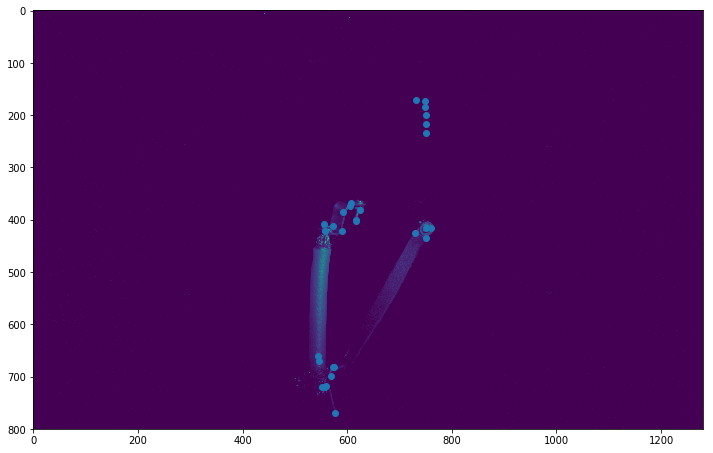

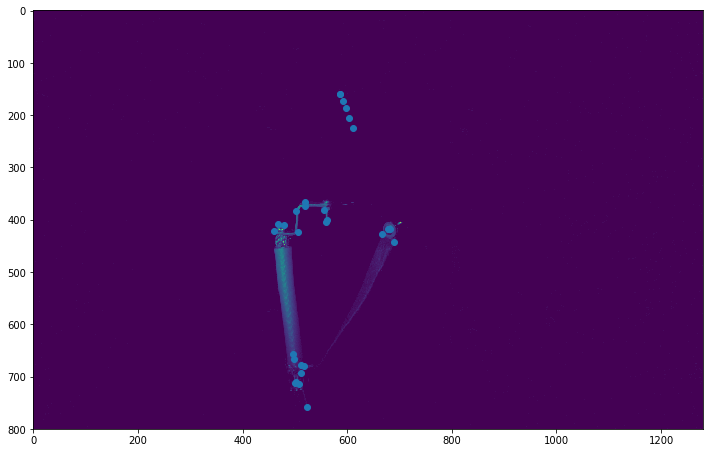

'\nPl0 = [181.544,384-211.678] # point in the left\nPr0 = [59.61,384-211.61] # point in the right\nPl1 = [223.43,384-240] \nPr1 = [99.95,384-241.25] \nPl2 = [318.36,384-180.55] \nPr2 = [223.26,384-178.93] \nPl3 = [247.01,384-228.00] \nPr3 = [147.036,384-228.629]\nPl4 = [268.1624283,384-196.9579168]\nPr4 = [380.9819863,384-197.3868557]\nPl5 = [122.4970724,384-255.5938338]\nPr5 = [254.4025837,384-258.4559182]\nPl6 = [101.9839782,384-328.4487622]\nPr6 = [157.0699359,384-328.4861723]\nPl7 = [117.1437091,384-372.7670914]\nPr7 = [154.1756298,384-372.2922456]\nPl8 = [69.04573449,384-327.5660105]\nPr8 = [200.9878585,384-327.1738984]\nPl9 = [159.2819549,384-306.8727401]\nPr9 = [277.7101701,384-313.5317582]\nPl10 = [246.184615,66.758974]\nPl11 = [255.875587,67.098592]\nPr10 = [198.102990,60.109635]\nPr11 = [210.071705,60.023256]\nPl12 = [296.0, 185.0]\nPr12 = [99.0, 186]\nPl13 = [251.991004,49.052474]\nPr13 = [203.005249,41.871391]\nPl14 = [245.082456,17.017544]\nPr14 = [234.976577,5.996396]\nPl

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as LA
import pandas as pd
from pandas import DataFrame, Series  # for convenience
import pims
import trackpy as tp
import math
from scipy.misc import imsave
from scipy.misc import imread
shot = 115
picL = 18333
picR = 18158
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))
height,width = bk0L.shape
print(width,height)
# Use https://automeris.io/WebPlotDigitizer/ to select ~8 corresponding points in the right and left camera
calL= pd.read_csv("calL_comb.csv",header=None)
calR= pd.read_csv("calR_comb.csv",header=None)
calL.columns = ['XL','YL']
calR.columns = ['XR','YR']
calPoint = pd.concat([calL, calR], axis=1)
print(calPoint)
plt.figure(figsize=[12,12])
plt.imshow(bk0L)
plt.scatter(calPoint['XL'],calPoint['YL'], marker='o')
plt.show()
plt.figure(figsize=[12,12])
plt.imshow(bk0R)
plt.scatter(calPoint['XR'],calPoint['YR'], marker='o')
plt.show()

#print(calPoint)
'''
Pl0 = [181.544,384-211.678] # point in the left
Pr0 = [59.61,384-211.61] # point in the right
Pl1 = [223.43,384-240] 
Pr1 = [99.95,384-241.25] 
Pl2 = [318.36,384-180.55] 
Pr2 = [223.26,384-178.93] 
Pl3 = [247.01,384-228.00] 
Pr3 = [147.036,384-228.629]
Pl4 = [268.1624283,384-196.9579168]
Pr4 = [380.9819863,384-197.3868557]
Pl5 = [122.4970724,384-255.5938338]
Pr5 = [254.4025837,384-258.4559182]
Pl6 = [101.9839782,384-328.4487622]
Pr6 = [157.0699359,384-328.4861723]
Pl7 = [117.1437091,384-372.7670914]
Pr7 = [154.1756298,384-372.2922456]
Pl8 = [69.04573449,384-327.5660105]
Pr8 = [200.9878585,384-327.1738984]
Pl9 = [159.2819549,384-306.8727401]
Pr9 = [277.7101701,384-313.5317582]
Pl10 = [246.184615,66.758974]
Pl11 = [255.875587,67.098592]
Pr10 = [198.102990,60.109635]
Pr11 = [210.071705,60.023256]
Pl12 = [296.0, 185.0]
Pr12 = [99.0, 186]
Pl13 = [251.991004,49.052474]
Pr13 = [203.005249,41.871391]
Pl14 = [245.082456,17.017544]
Pr14 = [234.976577,5.996396]
Pl15 = [345,262]
Pr15 = [67,267]
Pl16 = [345,253]
Pr16 = [73,257]
Pl17 = [342,239]
Pr17 = [81,243]
Pl18 = [335,223]
Pr18 = [88,226]
'''

In [2]:
'''
PL = []
PL.append(Pl0)
PL.append(Pl1)
PL.append(Pl2)
PL.append(Pl3)
PL.append(Pl4)
PL.append(Pl5)
PL.append(Pl6)
PL.append(Pl7)
PL.append(Pl8)
PL.append(Pl9)
PL.append(Pl10)
PL.append(Pl11)
PL.append(Pl12)
PL.append(Pl13)
PL.append(Pl14)
PL.append(Pl15)
PL.append(Pl16)
PL.append(Pl17)
PL.append(Pl18)
PR = []
PR.append(Pr0)
PR.append(Pr1)
PR.append(Pr2)
PR.append(Pr3)
PR.append(Pr4)
PR.append(Pr5)
PR.append(Pr6)
PR.append(Pr7)
PR.append(Pr8)
PR.append(Pr9)
PR.append(Pr10)
PR.append(Pr11)
PR.append(Pr12)
PR.append(Pr13)
PR.append(Pr14)
PR.append(Pr15)
PR.append(Pr16)
PR.append(Pr17)
PR.append(Pr18)
'''

'\nPL = []\nPL.append(Pl0)\nPL.append(Pl1)\nPL.append(Pl2)\nPL.append(Pl3)\nPL.append(Pl4)\nPL.append(Pl5)\nPL.append(Pl6)\nPL.append(Pl7)\nPL.append(Pl8)\nPL.append(Pl9)\nPL.append(Pl10)\nPL.append(Pl11)\nPL.append(Pl12)\nPL.append(Pl13)\nPL.append(Pl14)\nPL.append(Pl15)\nPL.append(Pl16)\nPL.append(Pl17)\nPL.append(Pl18)\nPR = []\nPR.append(Pr0)\nPR.append(Pr1)\nPR.append(Pr2)\nPR.append(Pr3)\nPR.append(Pr4)\nPR.append(Pr5)\nPR.append(Pr6)\nPR.append(Pr7)\nPR.append(Pr8)\nPR.append(Pr9)\nPR.append(Pr10)\nPR.append(Pr11)\nPR.append(Pr12)\nPR.append(Pr13)\nPR.append(Pr14)\nPR.append(Pr15)\nPR.append(Pr16)\nPR.append(Pr17)\nPR.append(Pr18)\n'

In [3]:
A = []
one = [1,1,1,1,1,1,1,1,1]
zero = [0,0,0,0,0,0,0,0,0]
for ip in range(len(calPoint)):
    plx = calPoint['XL'].iloc[ip]
    ply = calPoint['YL'].iloc[ip]
    prx = calPoint['XR'].iloc[ip]
    pry = calPoint['YR'].iloc[ip]
    print(plx,ply,prx,pry)
    #plx = PL[ip][0]
    #ply = PL[ip][1]
    #prx = PR[ip][0]
    #pry = PR[ip][1]
    xlxr = plx*prx
    xlyr = plx*pry
    xl = plx
    ylxr = ply*prx
    ylyr = ply*pry
    yl = ply
    xr = prx
    yr = pry
    null = 1
    Ai = [xlxr,xlyr,xl,ylxr,ylyr,yl,xr,yr,1]
    A.append(Ai) 
Aarray = np.matrix(A)
AarrayT = Aarray.transpose()
AA = Aarray.transpose()*Aarray
AA

(747.99005964200001, 172.98508946299998, 586.99800994999998, 160.00099502500001)
(732.14507772000002, 170.03108808299999, 586.962962963, 158.97530864200002)
(749.12758620699992, 184.827586207, 591.88461538499996, 171.97578347599998)
(750.07738998499997, 199.03793626700002, 597.85173501600002, 187.04100946400001)
(750.96375617800004, 215.95881383900002, 604.07060518699996, 204.90201729099999)
(751.02464065699996, 234.93839835700001, 611.11494252900002, 224.13026819900003)
(750.50200800000005, 435.55326830000001, 690.26104420000013, 442.55817239999993)
(759.5381526000001, 416.46233169999999, 682.73092370000006, 416.92624769999998)
(730.42168670000001, 424.48790139999994, 665.66265060000001, 426.46540939999994)
(616.9678715, 402.82284920000001, 559.73895579999987, 403.79911610000005)
(624.49799199999995, 381.218593, 554.71887549999997, 381.68604060000007)
(605.92369480000002, 374.17408330000001, 519.07630519999998, 374.1304414)
(590.36144579999996, 421.90495650000003, 505.02008030000002, 

matrix([[  3.89751459e+12,   2.74066836e+12,   6.77550015e+09,
           2.43734342e+12,   2.20276193e+12,   4.39626910e+09,
           5.85353156e+09,   4.35578844e+09,   1.03205387e+07],
        [  2.74066836e+12,   2.45625736e+12,   4.94523148e+09,
           2.20276193e+12,   2.36432979e+12,   4.11561655e+09,
           4.35578844e+09,   4.08865656e+09,   7.97407975e+06],
        [  6.77550015e+09,   4.94523148e+09,   1.19483426e+07,
           4.39626910e+09,   4.11561655e+09,   8.04793734e+06,
           1.03205387e+07,   7.97407975e+06,   1.84581857e+04],
        [  2.43734342e+12,   2.20276193e+12,   4.39626910e+09,
           1.97711526e+12,   2.13473174e+12,   3.69334007e+09,
           3.87735010e+09,   3.66929353e+09,   7.09571908e+06],
        [  2.20276193e+12,   2.36432979e+12,   4.11561655e+09,
           2.13473174e+12,   2.56566077e+12,   4.08720017e+09,
           3.66929353e+09,   4.05987758e+09,   6.93083209e+06],
        [  4.39626910e+09,   4.11561655e+09,   8.0

In [4]:
w, v = LA.eig(AA)
v1 = v.transpose()
print(w)
print(v1)
imin = np.argmin(w)
print(imin)
en = w[imin]
ev = v1[imin]
ev

[  9.86428678e+12   1.00901618e+12   2.27167452e+10   5.62939374e+08
   7.93334640e+04   1.06552279e+03   7.94062755e+01   1.74284777e+01
   4.27593426e-04]
[[  5.81771398e-01   4.96299150e-01   1.04116828e-03   4.44628803e-01
    4.66402348e-01   8.26078177e-04   9.12642823e-04   8.19958524e-04
    1.65742303e-06]
 [  7.42559519e-01  -1.37789734e-01   1.06166451e-03  -1.48005422e-01
   -6.38522923e-01  -4.54894176e-04   8.22214389e-04  -4.60185917e-04
    1.07945607e-06]
 [ -3.31878700e-01   5.61555555e-01  -6.67058624e-04   4.48433798e-01
   -6.11079303e-01   4.72637443e-04  -6.10585957e-06   6.57880956e-04
   -2.65705923e-08]
 [  9.82535443e-05  -6.47489218e-01  -1.14261850e-02   7.61041769e-01
   -3.65841176e-02  -5.93607953e-03  -6.07094860e-03  -5.66389643e-03
   -2.84159126e-05]
 [  1.62104259e-03   1.05765452e-02  -6.55059315e-01  -1.08366605e-02
    8.99078764e-04  -3.91036402e-01  -5.25296828e-01  -3.76583211e-01
   -1.84951420e-03]
 [  1.12726346e-03  -8.49663696e-04  -4.074

matrix([[  1.68455836e-06,   3.12678476e-07,  -1.44761423e-03,
           6.38212489e-07,   3.29357204e-07,   2.14847389e-04,
          -1.05992000e-03,  -1.13780409e-03,   9.99997720e-01]])

In [5]:
AA*ev.transpose()

matrix([[  3.42726707e-07],
        [ -2.51457095e-07],
        [ -6.18827471e-07],
        [ -2.49594450e-07],
        [ -6.35161996e-07],
        [  9.12659743e-08],
        [ -4.52913810e-07],
        [ -4.87103534e-07],
        [  4.27592451e-04]])

In [6]:
ev1 = np.array(ev)
ev1 = ev1[0]
F = [[ev1[0],ev1[3],ev1[6]],[ev1[1],ev1[4],ev1[7]],[ev1[2],ev1[5],ev1[8]]]
MatrixL = np.array(F)
MatrixR = MatrixL.transpose()
MatrixL

array([[  1.68455836e-06,   6.38212489e-07,  -1.05992000e-03],
       [  3.12678476e-07,   3.29357204e-07,  -1.13780409e-03],
       [ -1.44761423e-03,   2.14847389e-04,   9.99997720e-01]])

(0, 1.4718894641899858, 1.2420693802145315)
(1, 8.625421623828835, 7.308548081639058)
(2, 0.3509081427054646, 0.2962047459208205)
(3, 2.7144123832182148, 2.2932038191674224)
(4, 5.245943461044234, 4.439990556408118)
(5, 6.181015271409797, 5.245629238063161)
(6, 4.738866506492426, 4.288881759955909)
(7, 3.9080957660432496, 3.480357359629596)
(8, 0.6695723690468531, 0.6064961544219561)
(9, 2.7389328735947696, 2.5908759595589643)
(10, 4.245355324755042, 3.986945611894862)
(11, 2.281270982140476, 2.176825882216271)
(12, 7.5139613161730265, 7.3471339061456)
(13, 11.45349900802422, 11.413952332429679)
(14, 0.7810488263752311, 0.8357076426134992)
(15, 3.323579999461169, 3.571370585190068)
(16, 2.540960975412119, 2.687507681411714)
(17, 6.915952364969942, 7.2610900533182114)
(18, 7.524361661776741, 8.015572158057239)
(19, 0.3176773618060303, 0.2843470070111472)
(20, 0.729535684483567, 0.6893378035054258)
(21, 0.3980669402993459, 0.379072214614943)
(22, 5.2313781681850395, 5.263294181613246)
(2

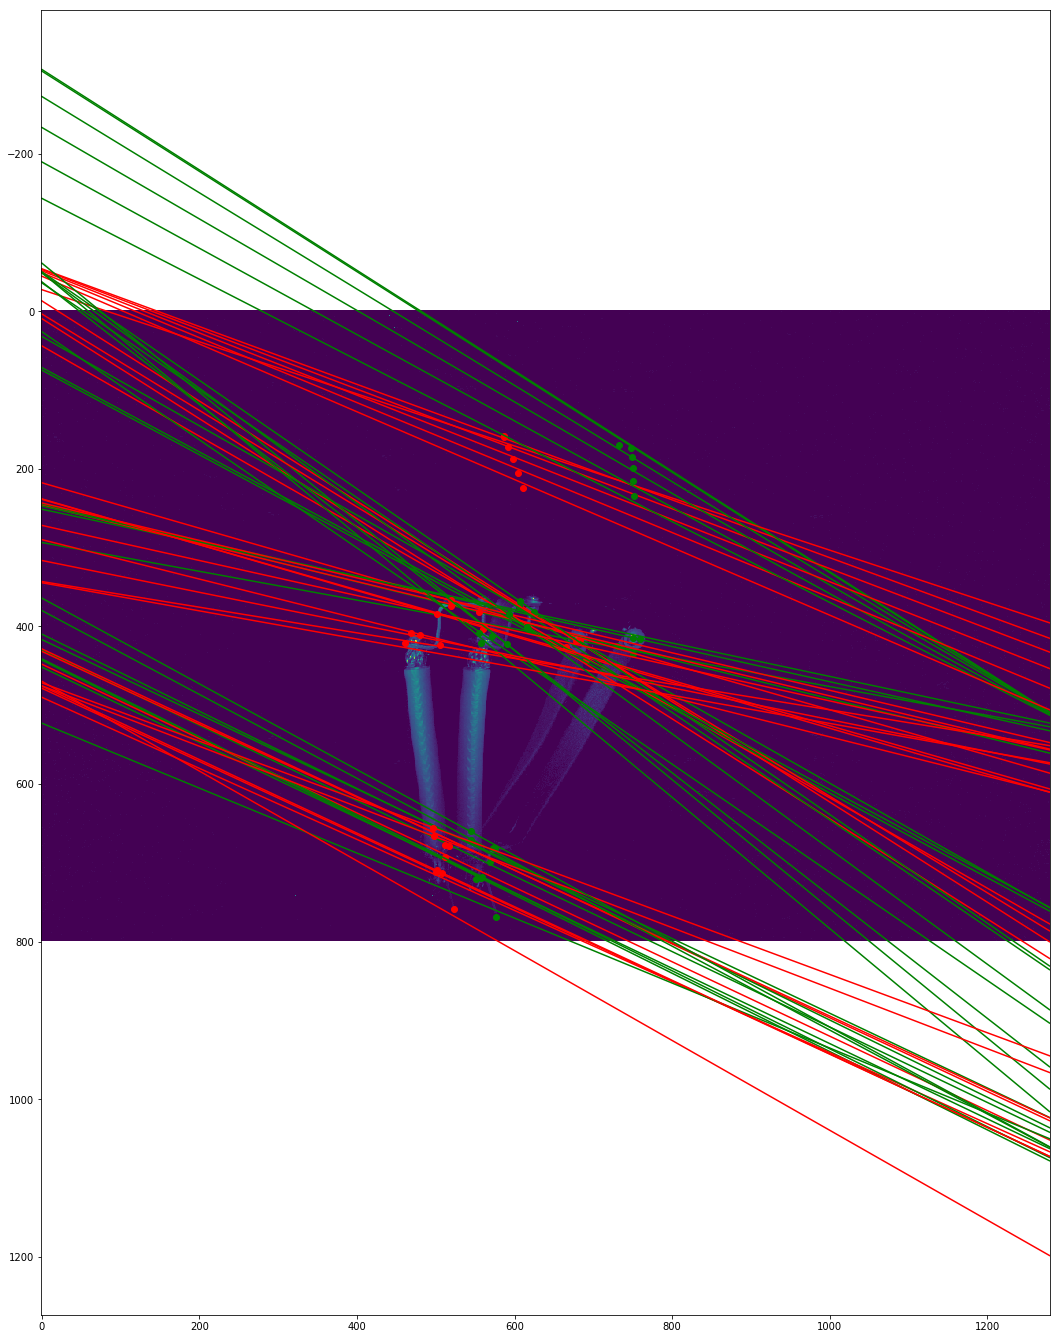

In [7]:
bk0L = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameL0.tif'.format(shot,shot,picL))
bk0R = imread('./Data/Shot{}/Clean_Data_Shot{}_Cam_{}/FrameR0.tif'.format(shot,shot,picR))
plt.figure(figsize=[24,24])
plt.imshow(bk0R+bk0L)
x = np.arange(0,width,1)
for ip in range(0,len(calPoint)):
    plx = calPoint['XL'].iloc[ip]
    ply = calPoint['YL'].iloc[ip]
    prx = calPoint['XR'].iloc[ip]
    pry = calPoint['YR'].iloc[ip]
    ipL = [plx,ply,1]
    ipR = [prx,pry,1]
    #ipL = PL[ip]
    #ipR = PR[ip]
    #off = np.ones((1,1))
    #ipL = np.append(ipL, off)
    #ipR = np.append(ipR, off)
    LineL = np.dot(ipR,MatrixL) #points in the right frame and the corresponding epipolar lines in the left frame
    LineR = np.dot(ipL,MatrixR) #points in the left frame and the corresponding epipolar lines in the right frame
    yL = (-LineL[2]-LineL[0]*x)/LineL[1]
    yR = (-LineR[2]-LineR[0]*x)/LineR[1]
    dlr = math.fabs(np.dot(ipL,LineL))/math.sqrt(LineL[0]*LineL[0]+LineL[1]*LineL[1])
    drl = math.fabs(np.dot(ipR,LineR))/math.sqrt(LineR[0]*LineR[0]+LineR[1]*LineR[1])  
    plt.plot(x,yL,color='g')
    plt.plot(x,yR,color='r')
    plt.plot(prx,pry,"o",color='r')    
    plt.plot(plx,ply,"o",color='g')  
    print(ip,dlr,drl)
plt.show()

In [8]:
plt.figure(figsize=[24,24])
plt.imshow(bk0R+bk0L)
plt.savefig("bk.tif")